<a href="https://colab.research.google.com/github/Kunaltembhare003/Netflix-Movies-TV-Shows-EDA-and-clustring/blob/main/copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's see netflix data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/alma_better/capstone_project/netflix/data_NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
print(f' Number of observation: {data.shape[0]} \n Number of Features: {data.shape[1]}')

 Number of observation: 7787 
 Number of Features: 12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Finding the dataset contain null value

In [6]:
##nUMBER OF NULL VALUE
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Finding how many unique value are there in the datasets

In [7]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [8]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data cleaning

Converting date format to more features (year, month, date of released)

In [29]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['added_year'] = data['date_added'].dt.year
data['added_month'] = data['date_added'].dt.strftime("%B")

Finding Number of season and create new feature season_counts

In [10]:
data['season_count'] = data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

In [30]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,added_year,added_month,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,International TV Shows,In a future where the elite inhabit an island ...,2020.0,August,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016.0,December,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018.0,December,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017.0,November,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,January,


Remove season count information from duration feature

In [12]:
data['duration'] = data.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,0 August\n1 December\n2 ...,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,0 August\n1 December\n2 ...,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,0 August\n1 December\n2 ...,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,0 August\n1 December\n2 ...,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,0 August\n1 December\n2 ...,


change column name "listed_in" to "gener". As show/ movie belong to multiple gener. for furuthr use we going to use first substring from string as its gener

In [14]:
data = data.rename(columns={"listed_in":"genre"})
data["genre"] = data["genre"].apply(lambda x: x.split(",")[0])

In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,added_year,added_month,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,International TV Shows,In a future where the elite inhabit an island ...,2020.0,0 August\n1 December\n2 ...,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016.0,0 August\n1 December\n2 ...,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018.0,0 August\n1 December\n2 ...,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017.0,0 August\n1 December\n2 ...,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,0 August\n1 December\n2 ...,


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  genre         7787 non-null   object        
 11  description   7787 non-null   object        
 12  added_year    7777 non-null   float64       
 13  added_month   7777 non-null   object        
 14  season_count  7787 non-null   object        
dtypes: datetime64[ns](1), float64(1), int6

In [16]:
data.describe(include=["O"])

,show_id,type,title,director,cast,country,rating,duration,genre,description,added_month,season_count
count,7787,7787,7787,5398,7069,7280,7780,7787,7787,7787,7787,7787
unique,7787,2,7787,4049,6831,681,14,202,36,7769,1,16
top,s5049,Movie,Legend Quest: Masters of Myth,"Raúl Campos, Jan Suter",David Attenborough,United States,TV-MA,,Dramas,Multiple women report their husbands as missin...,0 August\n1 December\n2 ...,
freq,1,5377,1,18,18,2555,2863,2410,1384,3,7787,5377


#EDA

##univariant analysis

In [17]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

## coloumn 1: show id

In [18]:
# is show id is unique for every entry?
data["show_id"].nunique()

7787

Show_id is unique for every observation

## column 2: type : Identifier - A Movie or TV Show

In [19]:
data["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

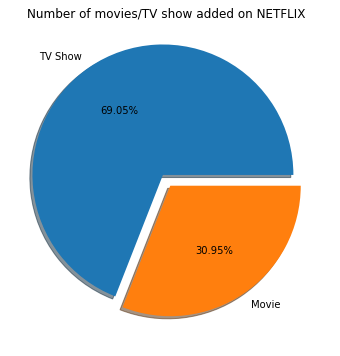

In [20]:
#
plt.pie(data["type"].value_counts(),labels=data["type"].unique(),
        shadow=True,
        autopct='%1.2f%%',
        explode=(0.1, 0.0))
plt.title("Number of movies/TV show added on NETFLIX  ")
plt.show()

## column 3: title : Title of the Movie / Tv Show

In [21]:
# is title is unique for every entry?
print(f' unique title: {data["title"].nunique()}')

 unique title: 7787


All title are unique

##column 4: director : Director of the Movie

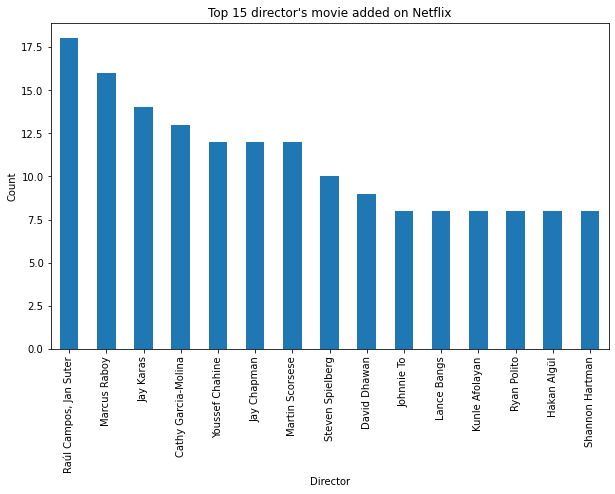

In [22]:
#top 15 director movie added on netflix
data["director"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 director's movie added on Netflix")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()

## coloums 5: cast : Actors involved in the movie / show

## coloums 6: country : Country where the movie / show was produced

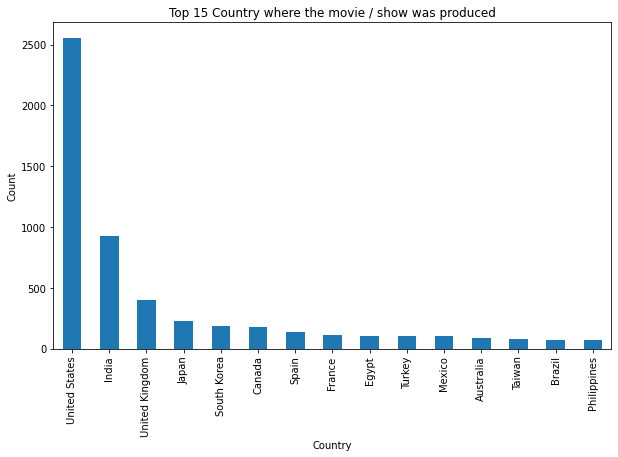

In [24]:
#top 15 country where the movie/shows was produced
data["country"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 Country where the movie / show was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

###COlioums 7: date_added : Date it was added on Netflix

As we converted date added to year added and month added.

In [25]:
data["added_year"].value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: added_year, dtype: int64

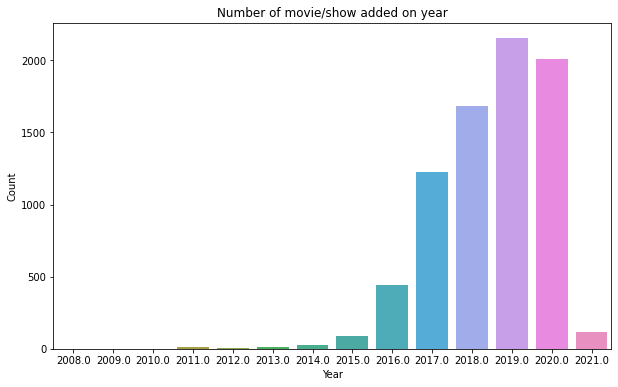

In [26]:

sns.countplot(x="added_year", data=data)
plt.title("Number of movie/show added on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


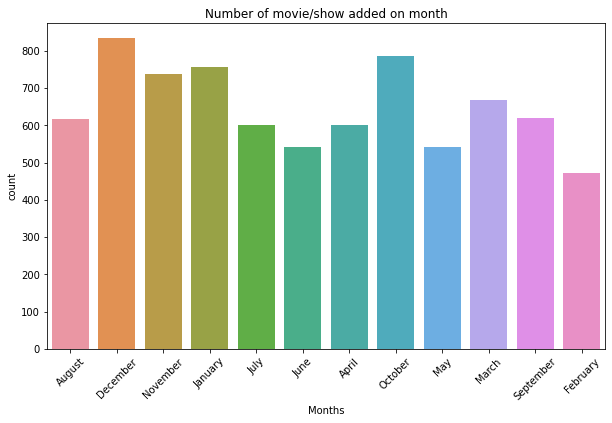

In [33]:
sns.countplot(x="added_month", data=data)
plt.title("Number of movie/show added on month")
plt.xlabel("Months")
plt.xticks(rotation =45)
plt.show()

###columns 8: release_year : Actual Releaseyear of the movie / show

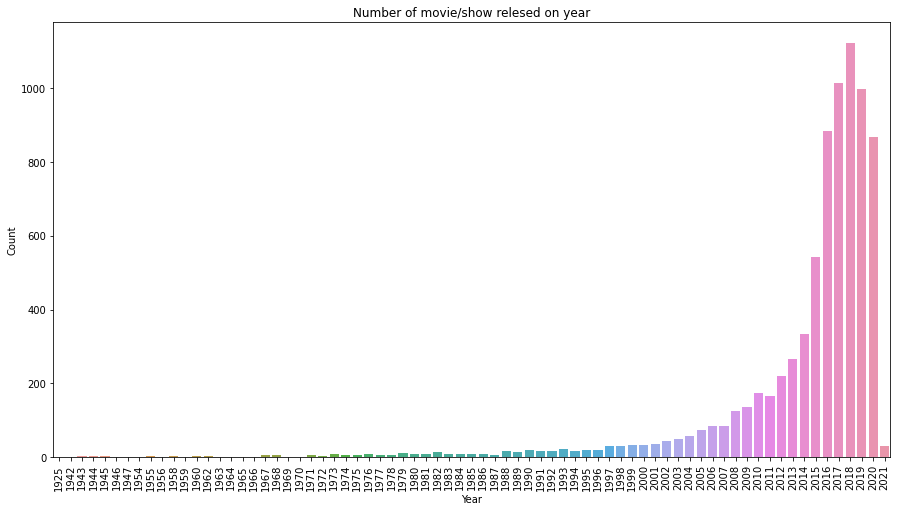

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="release_year", data=data)
plt.title("Number of movie/show relesed on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()

### columns 9: rating : TV Rating of the movie / show

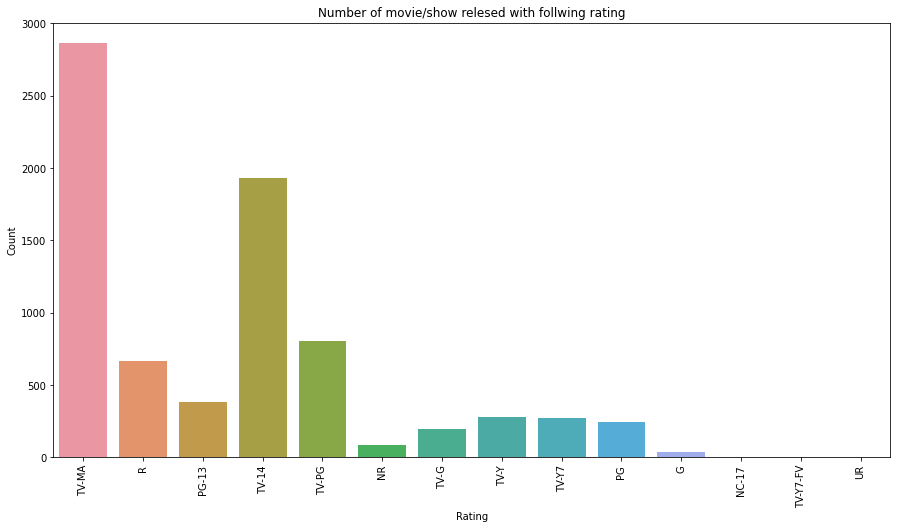

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="rating", data=data)
plt.title("Number of movie/show relesed with follwing rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()

### columns 10: duration : Total Duration - in minutes or number of seasons

In [52]:
data["duration"] = pd.to_numeric(data["duration"],downcast="float")

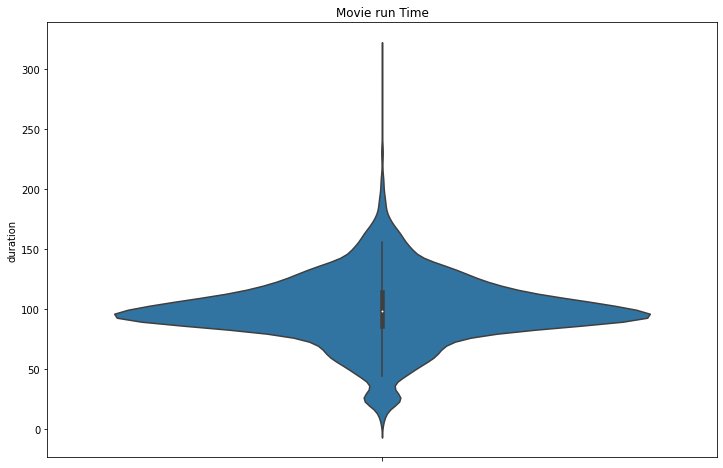

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(y="duration",data=data)
plt.title("Movie run Time")
plt.show()

### columns 11: Rating

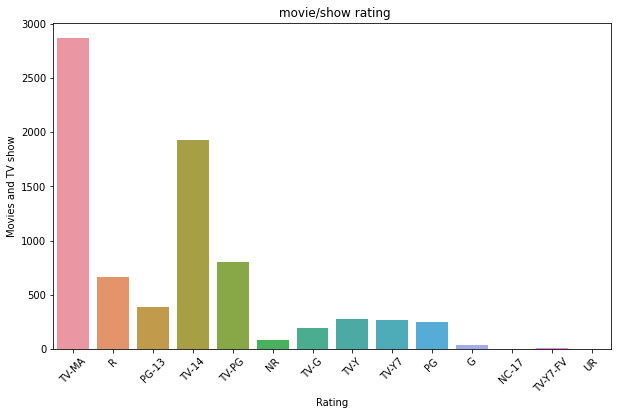

In [65]:
sns.countplot(x="rating", data=data)
plt.title(" movie/show rating")
plt.xlabel("Rating")
plt.ylabel("Movies and TV show")
plt.xticks(rotation =45)
plt.show()

###columns 12: listed_in : *Genere*

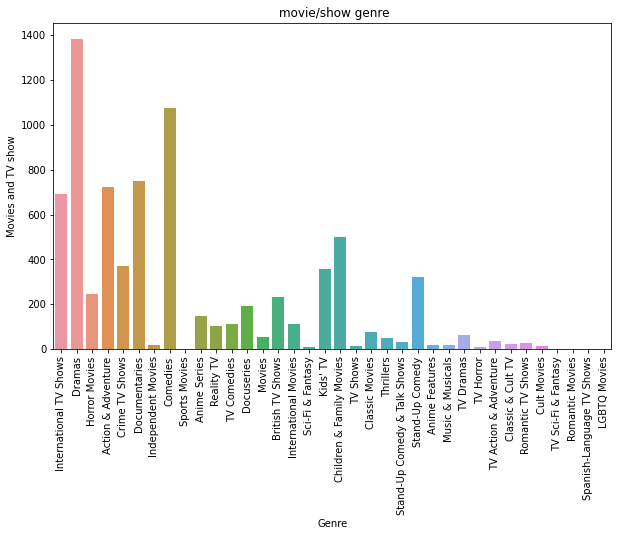

In [67]:
sns.countplot(x="genre", data=data)
plt.title(" movie/show genre")
plt.xlabel("Genre")
plt.ylabel("Movies and TV show")
plt.xticks(rotation =90)
plt.show()

## bivariant analysis